In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2021)

import warnings
warnings.filterwarnings(action='ignore')

## 데이터셋 로드

In [5]:
df = pd.read_excel('/content/drive/MyDrive/프로젝트/서울빅데이터대회/1.데이터/노인취약지수/new_noin.xlsx',index_col='지역')
df.head()

,65이상_남자,65이상_여자,국민기초생활보장수급권자_65~79세,국민기초생활보장수급권자_80세 이상,저소득노인_65~79세,저소득노인_80세 이상,응급실이용자_65세이상남자,응급실이용자_65세이상여자,노인인구밀도,2015년노인자살,2016노인자살,2017노인자살,2018노인자살,2019노인자살
지역,,,,,,,,,,,,,,
종로구,12334,15271,1099,346,323,205,2737.5,2816.0,23.91,7,10,9,4,13
중구,10597,13383,1056,391,187,138,2527.0,2905.5,9.96,12,8,8,4,4
용산구,16744,22140,1571,583,155,138,3641.5,4310.0,21.87,11,18,11,11,8
성동구,19950,25641,1530,690,315,233,4360.0,4961.5,16.86,19,22,19,15,6
광진구,22796,28019,1656,631,390,327,4856.5,4766.5,17.06,19,10,10,18,14


## 정규화

In [7]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(df)
std_df = pd.DataFrame(std_df, index=df.index, columns=df.columns)
std_df.head()

,65이상_남자,65이상_여자,국민기초생활보장수급권자_65~79세,국민기초생활보장수급권자_80세 이상,저소득노인_65~79세,저소득노인_80세 이상,응급실이용자_65세이상남자,응급실이용자_65세이상여자,노인인구밀도,2015년노인자살,2016노인자살,2017노인자살,2018노인자살,2019노인자살
지역,,,,,,,,,,,,,,
종로구,-1.932222,-1.979181,-1.288069,-1.500735,-0.698481,-0.785625,-1.430941,-1.455673,-0.032842,-1.830798,-1.376477,-1.455865,-1.926728,-0.797956
중구,-2.147015,-2.167444,-1.335658,-1.389324,-1.340849,-1.192528,-1.552636,-1.408173,-1.562040,-1.336522,-1.599208,-1.584475,-1.926728,-1.737956
용산구,-1.386893,-1.294234,-0.765706,-0.913969,-1.491994,-1.192528,-0.908320,-0.662764,-0.256467,-1.435377,-0.485553,-1.198645,-1.193734,-1.320178
성동구,-0.990447,-0.945129,-0.811080,-0.649057,-0.736267,-0.615577,-0.492940,-0.316994,-0.805662,-0.644536,-0.040092,-0.169765,-0.774880,-1.529067
광진구,-0.638518,-0.708005,-0.671636,-0.795130,-0.382020,-0.044699,-0.205903,-0.420486,-0.783738,-0.644536,-1.376477,-1.327255,-0.460739,-0.693511


In [9]:
std_df.shape

(25, 14)

## PCA

In [32]:
from sklearn.decomposition import PCA

nc = 14

pca = PCA(n_components=nc)
pca_array = pca.fit_transform(std_df)
pca_df = pd.DataFrame(pca_array, index=df.index,
                      columns=[f"pca{num+1}" for num in range(nc)])
pca_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
지역,,,,,,,,,,,,,,
종로구,-5.086454,-0.616624,0.053727,1.219006,0.655338,-0.108813,-0.127466,-0.493825,-0.235674,0.185437,-0.085696,-0.071416,0.018876,-0.067229
중구,-5.914938,-1.122910,-0.327323,-0.116869,-0.276692,0.100988,-0.018511,-0.257569,0.180837,-0.188150,-0.247434,0.025780,-0.100987,0.023061
용산구,-3.954455,0.095485,0.387442,-0.003040,-0.390610,0.259603,-0.602132,-0.594831,-0.133247,0.274382,-0.182296,0.190785,-0.022974,-0.050804
성동구,-2.533731,-0.348344,-0.137334,-0.395618,-0.758668,0.858800,0.054331,-0.186331,-0.372810,0.082003,0.153326,0.118469,-0.019253,-0.019698
광진구,-2.470157,-0.119475,-0.670044,0.033350,-0.212934,-0.850909,0.325349,0.316494,0.320308,0.259962,-0.029965,-0.126489,-0.067263,0.074985
동대문구,0.711372,-1.075821,-0.574273,-0.930350,-0.921714,-0.687120,0.501983,-0.787722,0.064293,-0.454751,0.162747,-0.121284,0.021558,0.071726
중랑구,2.099343,-0.155173,-0.688886,-0.689990,-0.057563,0.254221,-0.994373,-0.141930,0.642026,-0.231458,-0.140467,-0.078765,-0.129177,-0.026199
성북구,2.019546,0.388402,-0.961514,-0.025399,1.687598,-0.956429,-0.563326,-0.250354,-0.430230,-0.400176,0.329120,0.252950,-0.014562,-0.001531
강북구,1.483958,-0.906825,-0.846446,0.790397,-0.162750,0.323881,-0.414418,-0.049206,0.432539,0.428283,0.645002,-0.091897,0.161036,0.054364


In [33]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(nc)]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,9.713956,0.666100,0.666100
pca2,1.796360,0.123179,0.789279
pca3,1.074320,0.073668,0.862946
pca4,0.482022,0.033053,0.895999
pca5,0.399245,0.027377,0.923376
pca6,0.332344,0.022789,0.946166
pca7,0.271097,0.018589,0.964755
pca8,0.211262,0.014487,0.979242
pca9,0.136185,0.009338,0.988580
pca10,0.076638,0.005255,0.993835


Text(0.5, 1.0, 'Scree plot')

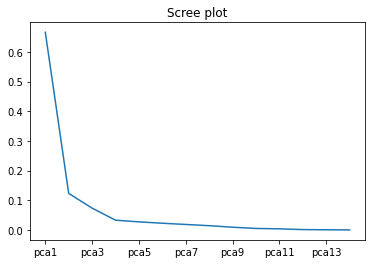

In [37]:
result['기여율'].plot.line()
plt.title('Scree plot')

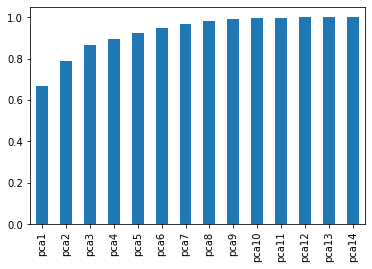

In [36]:
result['누적기여율'].plot.bar()

### 결과 

pca3일 경우에 누적 기여율이 85% 이상이며, 고유값이 1 이상이고,  
Scree plot확인 했을 때 완만해지는 지점이 pc4부분이므로 그 이전인 pca3까지를 이용하는 것이 옳다고 판단됨.

In [38]:
pca_df.to_csv('/content/drive/MyDrive/프로젝트/서울빅데이터대회/1.데이터/노인취약지수/pca결과.csv')